<a href="https://colab.research.google.com/github/kulraj97/ML-Practise/blob/main/DL_regression_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [35]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [38]:
dt=pd.read_csv("/content/gdrive/MyDrive/Admission_Predict.csv")

In [39]:
dt.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [40]:
dt.isnull().sum(),dt.duplicated().sum()

(Serial No.           0
 GRE Score            0
 TOEFL Score          0
 University Rating    0
 SOP                  0
 LOR                  0
 CGPA                 0
 Research             0
 Chance of Admit      0
 dtype: int64, 0)

In [41]:
dt.drop(columns="Serial No.",inplace=True)


In [42]:
x=dt.iloc[:,0:-1]
y=dt.iloc[:,-1]

In [43]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [44]:
from sklearn.model_selection import train_test_split


In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [46]:
x_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
336,319,110,3,3.0,2.5,8.79,0
64,325,111,3,3.0,3.5,8.70,0
55,320,103,3,3.0,3.0,7.70,0
106,329,111,4,4.5,4.5,9.18,1
300,309,106,2,2.5,2.5,8.00,0


In [47]:
from sklearn.preprocessing import StandardScaler


In [48]:
scaler=StandardScaler()

In [49]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [50]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense


In [60]:
model=Sequential()
model.add(Dense(7,activation="relu",input_dim=7))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="linear"))

In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 7)                 56        
                                                                 
 dense_5 (Dense)             (None, 1)                 8         
                                                                 
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.compile(loss="mse",optimizer="Adam")

In [67]:
history=model.fit(x_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
8/8 [==============================] - 0s 15ms/step - loss: 0.0063 - val_loss: 0.0076
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0063 - val_loss: 0.0076
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0063 - val_loss: 0.0076
Epoch 4/100
8/8 [==============================] - 0s 11ms/step - loss: 0.0063 - val_loss: 0.0076
Epoch 5/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0062 - val_loss: 0.0074
Epoch 6/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0062 - val_loss: 0.0074
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0062 - val_loss: 0.0074
Epoch 8/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0062 - val_loss: 0.0074
Epoch 9/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0061 - val_loss: 0.0073
Epoch 10/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0061 - val_loss: 0.0073
Epoch 11/100
8/8 [=======

In [64]:
y_pred=model.predict(x_test)

In [65]:
from sklearn.metrics import r2_score
 

In [66]:
r2_score(y_test,y_pred)

0.5873704663051736

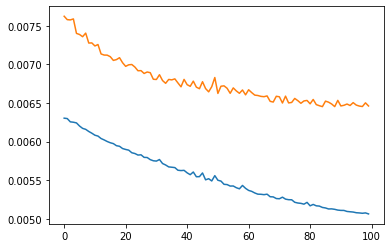

In [69]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])